In [1]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/diamond \
     --filename=out.log --output=../data/diamond-ref-kpts.json

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json

from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data = None
with open('../data/diamond-ref-kpts.json', 'r') as f:
    data = json.load(f)

kcalmol_to_hartree = 1 / 627.5
color = {'FFTISDF': 'b', 'GDF': 'r', 'RSDF': 'r', 'FFTDF': 'g'}


/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/diamond/2-3-3/fftisdf-80-10 {'method': 'fftisdf-80-10', 'basis': 'cc-pvdz', 'natm': 2.0, 'nkpt': 18.0, 'nao': 26.0, 'time_build_df': 10.6, 'naux': 260.0, 'time_krks': 1.8, 'ene_krks': -11.34051364, 'time_krhf': 1.28, 'ene_krhf': -11.02173824, 'time_kmp2': 4.68, 'ene_kmp2': -11.27419604, 'ene_corr_kmp2': -0.2524578, 'ene_corr_os': -0.17846376}


0.0015936254980079682
0.0015936254980079682
0.0015936254980079682


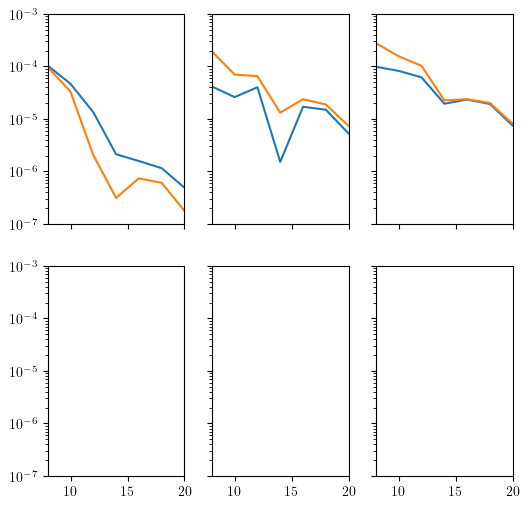

In [ ]:
kmesh_list = ["1-1-2", "2-2-2", "2-3-3"]

fsx = 6
fsy = 6

fig, ax = plt.subplots(2, len(kmesh_list), figsize=(fsx, fsy), sharex=True, sharey=True)

x = [] # v["naux"] / v["nao"] for k, v in data.items() if "fftisdf" in k]
for k, v in data.items():
    if "fftisdf" in v["method"] and "1-1-2" in k:
        x.append(v["naux"] / v["nao"])

for i, kmesh in enumerate(kmesh_list):
    method = "fftisdf-60"
    x = [v["naux"] / v["nao"] for k, v in data.items() if kmesh in k and method in v["method"]]
    e_hf = [v["ene_krhf"] / v["natm"] for k, v in data.items() if kmesh in k and method in v["method"]] 
    e_os = [v["ene_corr_os"] / v["natm"] for k, v in data.items() if kmesh in k and method in v["method"]]
    e_hf = np.array(e_hf)
    e_os = np.array(e_os)
    e_sos = 1.3 * e_os + e_hf
    
    x = np.array(x)
    ix = np.argsort(x)
    x = x[ix]
    e_hf = e_hf[ix]
    e_os = e_os[ix]
    e_sos = e_sos[ix]

    method = "fftdf-100"
    natm = [v["natm"] for k, v in data.items() if kmesh in k and v["method"] == method]
    natm = int(natm[0])
    
    e_hf_ref = [v["ene_krhf"] for k, v in data.items() if kmesh in k and v["method"] == method][0] / natm
    e_os_ref = [v["ene_corr_os"] for k, v in data.items() if kmesh in k and v["method"] == method][0] / natm
    e_sos_ref = 1.3 * e_os_ref + e_hf_ref

    ax[0, i].semilogy(x, abs(e_hf - e_hf_ref), label="KRHF FFTISDF-60")
    ax[0, i].semilogy(x, abs(e_sos - e_sos_ref), label="KR-SOS-MP2 FFTISDF-60")
    ax[0, i].semilogy(x, [], label="KR-SOS-MP2 FFTISDF-60")

    method = "fftdf-60"
    e_hf = [v["ene_krhf"] for k, v in data.items() if kmesh in k and v["method"] == method][0] / natm
    e_os = [v["ene_corr_os"] for k, v in data.items() if kmesh in k and v["method"] == method][0] / natm
    e_sos = 1.3 * e_os + e_hf

    err_hf = abs(e_hf - e_hf_ref)
    err_sos = abs(e_sos - e_sos_ref)

    ax[0, i].plot(x, [err_hf] * len(x),  label="KRHF FFTDF-60")
    ax[1, i].plot(x, [err_sos] * len(x), label="KRHF FFTDF-60")

    ax[0, i].set_xlim(x[0], x[-1])
    ax[0, i].set_ylim(1e-7, 1e-3)

# fig.legend()